Linear regression tutorial

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

sns.set_theme()

In [2]:
df = pd.read_csv("Ecommerce_data.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
df.info()

In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


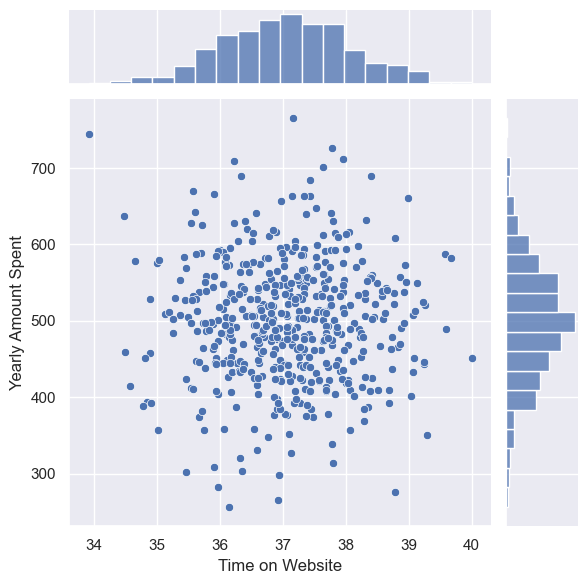

In [ ]:
#EDA
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df)

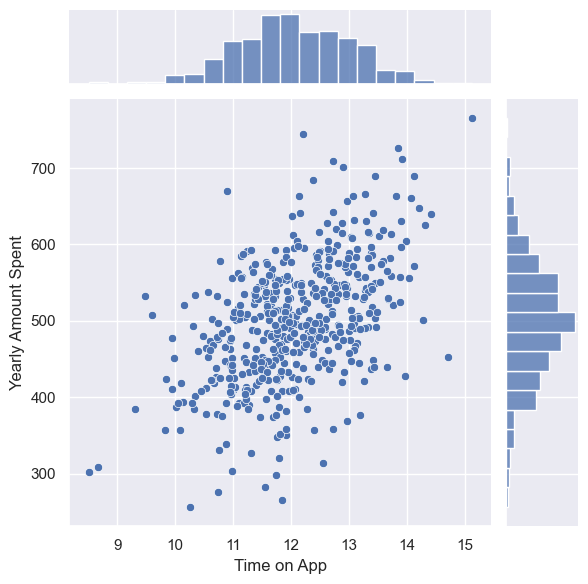

In [6]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data=df)

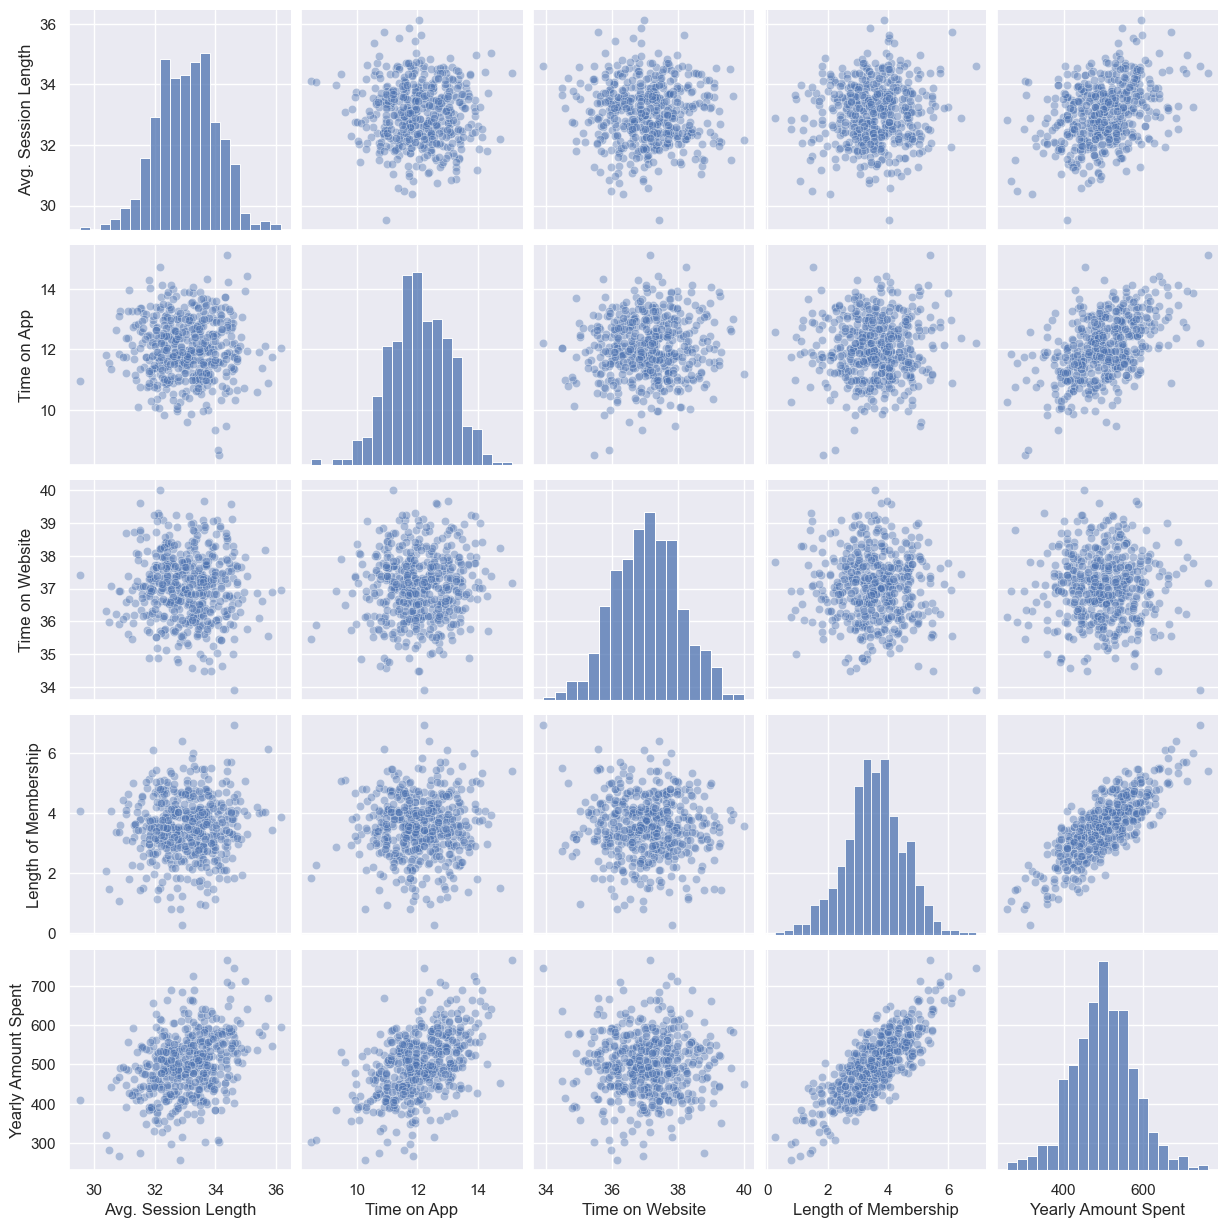

In [7]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.4})

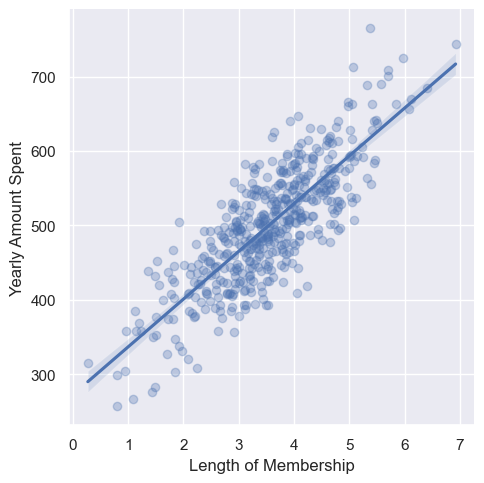

In [8]:
sns.lmplot(x = "Length of Membership", y = "Yearly Amount Spent", data = df, scatter_kws={"alpha":0.3})

In [24]:
x = df[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = np.asarray(df['Yearly Amount Spent'], dtype="|S6")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
y_train

array([b'637.10', b'479.23', b'549.86', b'457.84', b'397.42', b'461.62',
       b'581.85', b'420.91', b'508.73', b'616.85', b'459.28', b'564.79',
       b'556.29', b'554.72', b'445.74', b'541.04', b'619.89', b'549.90',
       b'478.18', b'570.45', b'490.73', b'744.22', b'327.37', b'506.54',
       b'642.10', b'373.88', b'430.58', b'557.52', b'460.06', b'531.96',
       b'546.55', b'424.67', b'488.27', b'570.63', b'432.48', b'472.99',
       b'594.27', b'469.31', b'496.55', b'506.53', b'627.60', b'478.95',
       b'663.07', b'582.49', b'549.00', b'448.34', b'505.77', b'515.82',
       b'555.89', b'407.65', b'436.58', b'338.31', b'409.07', b'513.45',
       b'490.20', b'467.50', b'458.37', b'578.24', b'487.64', b'382.41',
       b'523.63', b'571.30', b'479.61', b'282.47', b'524.79', b'508.77',
       b'408.21', b'256.67', b'558.94', b'493.18', b'410.60', b'446.41',
       b'347.77', b'352.55', b'439.99', b'482.14', b'591.78', b'565.99',
       b'626.01', b'547.36', b'492.94', b'505.11', 

In [25]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

d:\Data Science\myvenv\Lib\site-packages\sklearn\utils\multiclass.py:367: FutureWarning: Support for labels represented as bytes is deprecated in v1.5 and will error in v1.7. Convert the labels to a string or integer format.
  warnings.warn(
d:\Data Science\myvenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
lr.coef_

array([[ 0.53894444, -1.08821345, -0.36438611, -1.35878938],
       [-0.81978286,  0.14094496,  0.33351633, -1.25119422],
       [-0.75851893,  0.00862549,  0.03463848, -0.88748619],
       ...,
       [-0.2704599 ,  0.73734537,  0.21447203,  1.08500806],
       [ 1.20938108,  0.10951855, -1.52376991,  1.668484  ],
       [ 0.22618923,  1.75309734, -0.44935693,  0.66929316]],
      shape=(347, 4))

In [28]:
cdf = pd.DataFrame(lr.coef_, columns=x.columns)
cdf

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,0.538944,-1.088213,-0.364386,-1.358789
1,-0.819783,0.140945,0.333516,-1.251194
2,-0.758519,0.008625,0.034638,-0.887486
3,0.808969,-0.636047,-0.731977,-0.358531
4,0.667902,-0.596758,-0.383789,-1.477776
...,...,...,...,...
342,1.068811,0.171668,-1.023885,1.515384
343,0.475549,0.820884,-0.094595,0.556960
344,-0.270460,0.737345,0.214472,1.085008
345,1.209381,0.109519,-1.523770,1.668484


In [29]:
# predictions
predictions = lr.predict(x_test)
predictions

array([b'357.78', b'493.18', b'408.64', b'427.35', b'408.64', b'524.79',
       b'527.78', b'479.73', b'357.78', b'387.35', b'479.73', b'408.95',
       b'527.78', b'537.91', b'350.05', b'302.18', b'626.01', b'527.78',
       b'467.42', b'479.73', b'546.55', b'546.55', b'427.35', b'725.58',
       b'493.18', b'527.78', b'538.77', b'527.78', b'357.78', b'282.47',
       b'669.98', b'489.81', b'493.18', b'314.43', b'479.73', b'527.78',
       b'627.60', b'374.26', b'479.73', b'479.73', b'527.78', b'314.43',
       b'493.18', b'479.73', b'524.79', b'584.21', b'581.79', b'493.18',
       b'350.05', b'350.05', b'357.78', b'524.79', b'538.77', b'660.42',
       b'556.29', b'527.78', b'314.43', b'427.35', b'577.73', b'538.77',
       b'524.79', b'352.55', b'478.17', b'493.18', b'493.18', b'493.18',
       b'304.13', b'640.18', b'427.35', b'493.18', b'537.91', b'597.73',
       b'725.58', b'556.29', b'356.61', b'527.78', b'479.73', b'445.74',
       b'393.85', b'546.55', b'583.07', b'765.51', 

Text(0.5, 0, 'Predictions')

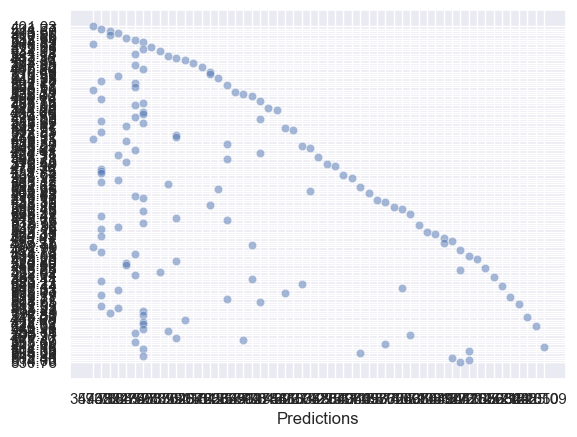

In [31]:
sns.scatterplot(x = predictions, y = y_test, alpha=0.5)
plt.xlabel("Predictions")